<a href="https://colab.research.google.com/github/JOteng15/CODSOFT/blob/main/Sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Sales prediction**
Problem statement:
* Sales prediction involves forecasting the amount of a product that
customers will purchase, taking into account various factors such as
advertising expenditure, target audience segmentation, and
advertising platform selection.
*In businesses that offer products or services, the role of a Data
Scientist is crucial for predicting future sales. They utilize machine
learning techniques in Python to analyze and interpret data, allowing
them to make informed decisions regarding advertising costs. By
leveraging these predictions, businesses can optimize their
advertising strategies and maximize sales potential.

#**Importing libraries**

In [ ]:
import numpy as np

# Data processing and reading
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Data visualisation
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
import plotly.express as px

#Model training and building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#Data loading and information

In [ ]:
df = pd.read_csv("advertising.csv")

In [ ]:
data = df.copy()

In [ ]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
data.shape

(200, 4)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


No missing data :)

In [ ]:
data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


#**Data visualisation**

#Analysis of pairplot
* By the graphical illustrations, a linear regression model seems plausible to use for model building.
* In terms of the shape of the histograms, TV has a unimodal shape, Radio is bimodal, Newspaper has right skew shape and Sales seems normally distributed.


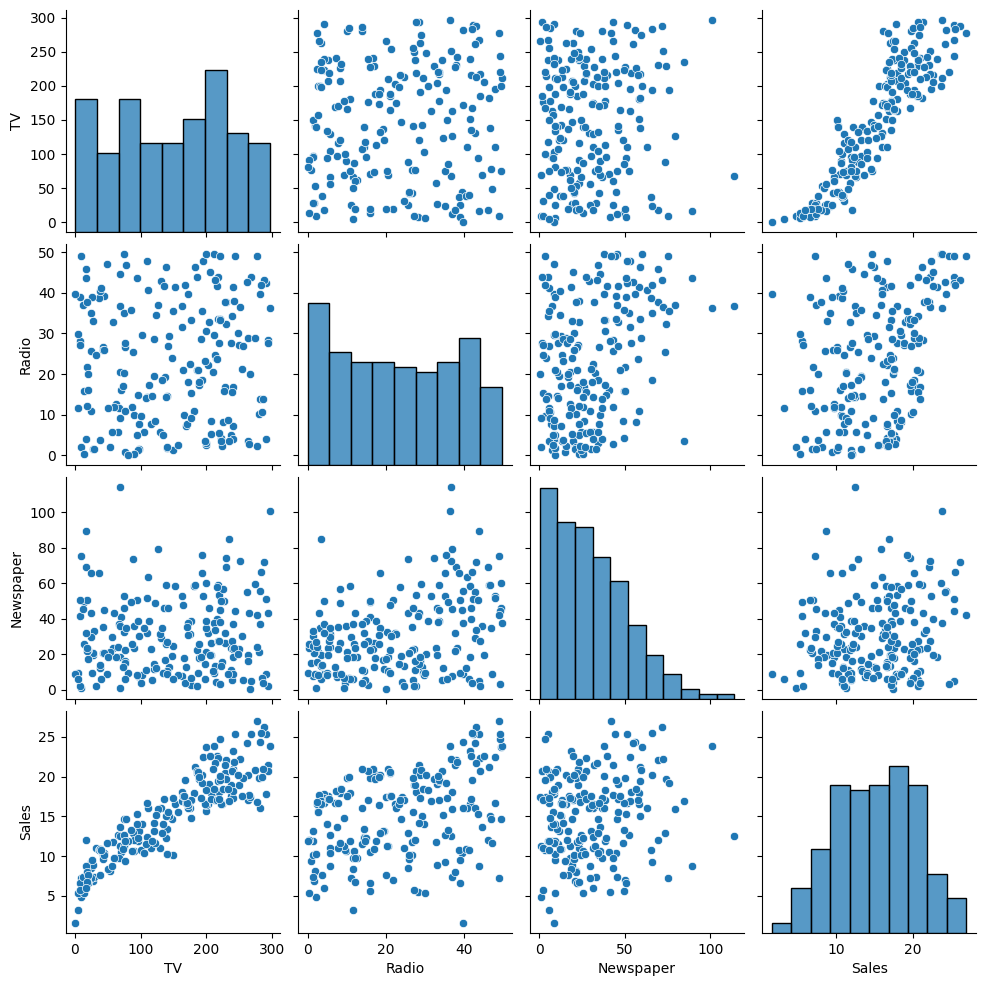

In [ ]:
sns.pairplot(data = data)

In [ ]:
for i in range(data.shape[1]):
  print("The skew of",str(data.columns[i]),"is",data[data.columns[i]].skew())

The skew of TV is -0.06985336213274573
The skew of Radio is 0.09417463149664404
The skew of Newspaper is 0.8947204074986175
The skew of Sales is -0.07373923537186912


<Axes: >

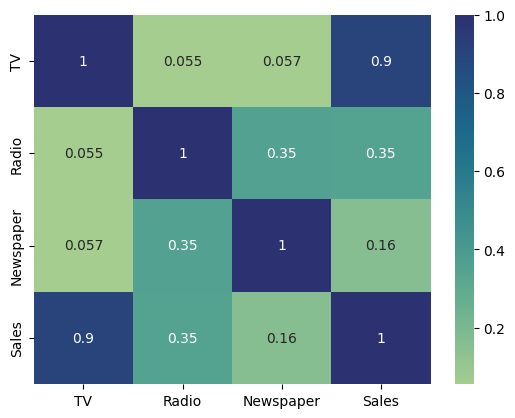

In [ ]:
sns.heatmap(data.corr(),annot = True, cmap = "crest")

Evidenced by the heatmap and the regression plots, TV and Sales are strongly correlated.

<Axes: xlabel='TV', ylabel='Sales'>

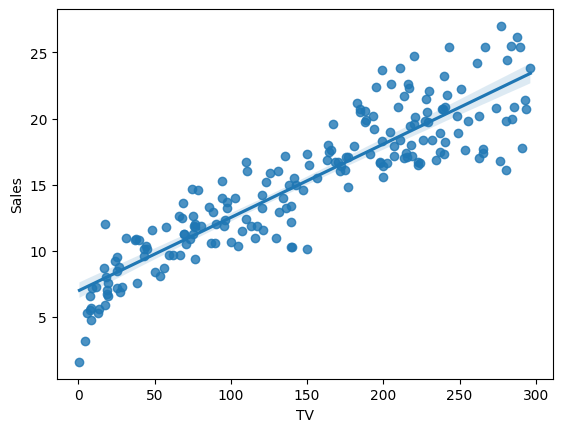

In [ ]:
sns.regplot(x = data["TV"], y = data["Sales"])

The bin width in plotly allows to spectate the skew of Newspapers better.

In [ ]:
px.histogram(data, x = "Newspaper")

In [ ]:
px.box(data,x = "Newspaper")

In [ ]:
Q1 = data["Newspaper"].quantile(0.25)
Q3 = data["Newspaper"].quantile(0.75)
IQR = Q3-Q1
new_df  = data[(data["Newspaper"] >= Q1 - 1.5 * IQR) & (data["Newspaper"] <= Q3 + 1.5 * IQR)]


In [ ]:
px.box(new_df,x = "Newspaper")

#**Model building and training**

In [ ]:
X=df.drop('Sales',axis=1)
y=df["Sales"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=24)

In [ ]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lreg.predict(X_test)

# RMSE
print(np.sqrt(mean_squared_error(y_test, y_pred)))
# R^2 score
print(r2_score(y_test, y_pred))

1.4736632095214703
0.9128247571522388


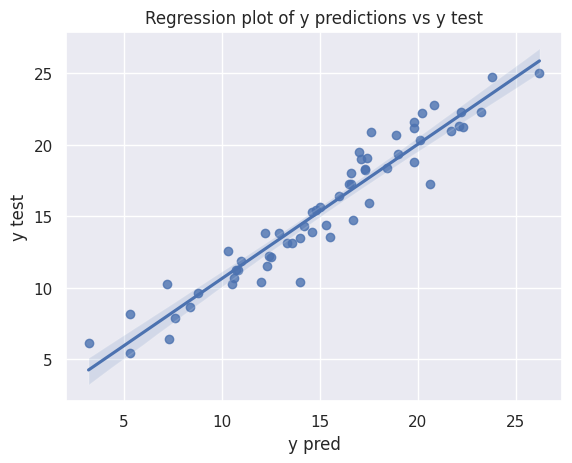

In [ ]:
sns.regplot(x = y_test, y = y_pred)
plt.title("Regression plot of y predictions vs y test")
plt.xlabel("y pred")
plt.ylabel("y test")
sns.set_style(rc = {'axes.facecolor': 'lightsteelblue'})


In [ ]:
y_train_pred = lreg.predict(X_train)

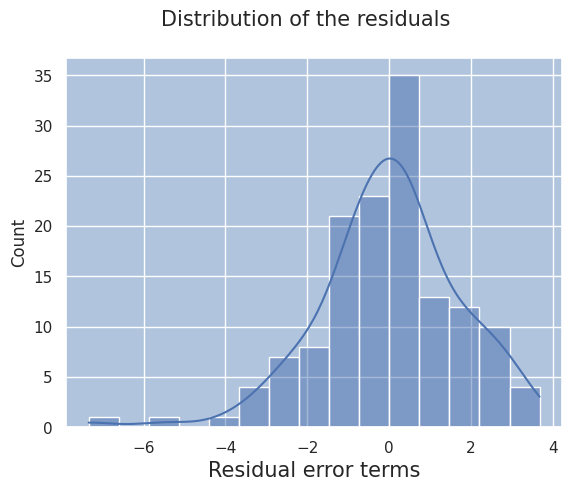

In [ ]:
residuals = (y_train.tolist() - y_train_pred)
fig = plt.figure()
sns.histplot(residuals, bins = 15,kde = True)
fig.suptitle('Distribution of the residuals', fontsize = 15)
plt.xlabel('Residual error terms', fontsize = 15)
plt.show()

#**Conclusion**
We proceeded with a multiple linear regression model, which seemingly fits the data and has a good predictive power. Briefly analysing the distribution of the residuals, the presumption of the normality of the residuals is verified here.Hence, model inferences can be taken to be valid. In the future, we could conduct covariate selection or feature selection, to attain a model which explains the most variation. In such cases, a simpler model is sought for.